In [1]:
from sphviewer.tools import QuickView
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import heapq
from scipy.spatial import cKDTree
import matplotlib as mpl
# from pygadgetreader.readgadget.readgadget import readsnap, readhead, readheader
from pygadgetreader import readsnap, readhead, readheader
# import pygadgetreader
import random

In [2]:
def plot_star(star, scale_star, rotation_matrix, file_id, simulation_name ,z,  r = 'infinity', p = 0,v = [4.3, 8.8], zoom=1):
    star_rot = star.copy()
    star_rot[:,:3] = np.dot(star_rot[:,:3], rotation_matrix)
    star_index = []
    for i in range(len(star)):
        if abs(star_rot[i,0]) < scale_star and abs(star_rot[i,1]) < scale_star and abs(star_rot[i,2]) < scale_star:
            star_index.append(i)
    star_chosen = star_rot[star_index]
    print(len(star_index))
    star_rot_pos1 = np.hstack((np.array([star_chosen[:,1]]).T, np.array([star_chosen[:,2]]).T,
                                    np.array([star_chosen[:,0]]).T))
    star_rot_pos2 = np.hstack((np.array([star_chosen[:,0]]).T, np.array([star_chosen[:,1]]).T,
                                    np.array([star_chosen[:,2]]).T))
    # star_rot_pos = star_rot
    print(file_id)
    # sphviewer
    print(star_rot_pos1.shape)

    # print(np.min)
    qv_1 = QuickView(star_rot_pos1, mass=star_chosen[:,3]*(10e10),  r=r, plot=False, zoom=zoom)
    qv_2 = QuickView(star_rot_pos2, mass=star_chosen[:,3]*(10e10),  r=r, plot=False, zoom=zoom)
    
    plt.figure(figsize=(10, 5.2))
    norm = mpl.colors.Normalize(vmin=v[0], vmax=v[1])
    
    # imshow
    ax1 = plt.subplot(121)
    img = qv_2.get_image()
    extent = qv_2.get_extent()
    ax1.set_title('$Face-on$')
    ax1.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)
    

    ax2 = plt.subplot(122)
    img = qv_1.get_image()
    extent = qv_1.get_extent()
    ax2.set_title('$Edge-on$')
    ax2.imshow(img, extent=extent, cmap='gnuplot2',origin='lower',norm=norm)

    plt.suptitle(simulation_name + ", z=%.3f, phy_dis=%.2fMpc"%(z, scale_star/(1+z)))
    plt.show()
    # plt.close()
    # plt.show()
    return 0

In [41]:
def cal_c_a_ratio(satellite_coordinate):
    
    n = len(satellite_coordinate)
    I = np.zeros([3,3])
    for i in range(3):
        for j in range(3):
            for k in range(n):
                I[i][j] = I[i][j] + satellite_coordinate[k][i]*satellite_coordinate[k][j]
    # print(I)
    eigenvalue, featurevector = np.linalg.eig(I)
    # print("eigenvalue:", eigenvalue)
    # print("featurevector:", featurevector)
    c = min(eigenvalue)**0.5
    a = max(eigenvalue)**0.5
    rng=range(len(eigenvalue))
    mindex=min(rng,key=lambda x:eigenvalue[x])

    # np.matrix(featurevector).I
    # print("c/a=", c/a)
    return c/a, np.matrix(featurevector).I

In [52]:
c_a, rotation_matrix = cal_c_a_ratio(star1[:,:3])

In [43]:
rotation_matrix

matrix([[ 0.8705498 ,  0.23303116, -0.43340457],
        [ 0.48931658, -0.31672841,  0.81255917],
        [-0.05208007,  0.91944526,  0.38975386]])

In [68]:
# # from 13 satellite
# rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
#                            [-0.32955748, -0.9318545 , -0.15178623],\
#                            [-0.73768155,  0.15380598,  0.65739611]])
# rotation_matrix = np.array(array([-0.05208007,  0.91944526,  0.38975386]))
simulation_name = 'zcut7'
scale_subhalo = 100
file_ids = np.loadtxt("data/file_id.txt",dtype=str)
h = 0.6777
#134, 145, 158, 175,182,188,199
# i = 145
i = 175
z = np.loadtxt("z.txt")
file_id = file_ids[i]
tan_225 = 0.41421356237

In [79]:
188+199

387

In [80]:
387/2

193.5

In [ ]:
z[]

In [69]:
z[i]

0.25000000984357085

In [70]:
star1 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/star_data_120kpc/%s.txt"%('zcut7', file_id))
star2 = np.loadtxt("/data/inspur_disk06/userdir/zhaox/%s/star_data_120kpc/%s.txt"%('7DM_GAS', file_id))

In [71]:
star1.shape

(93141, 4)

In [72]:
star2.shape

(126271, 4)

In [73]:
scale_subhalo = 50/1000
r = scale_subhalo/tan_225
# r = 'infinity'
zoom = 1/tan_225
# zoom = 1
p = 0

# v = [6, 10.5]
rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
                           [-0.32955748, -0.9318545 , -0.15178623],\
                           [-0.73768155,  0.15380598,  0.65739611]])

# rotation_matrix = np.array([[-0.66681059,  0.13506486, -0.73288548],
#                             [-0.04041349, -0.98854559, -0.14541102],
#                             [-0.74413063, -0.06734315,  0.66463111]])
# # v = [4,9]
v=[6,9.5]


92252
175_z000p250
(92252, 3)


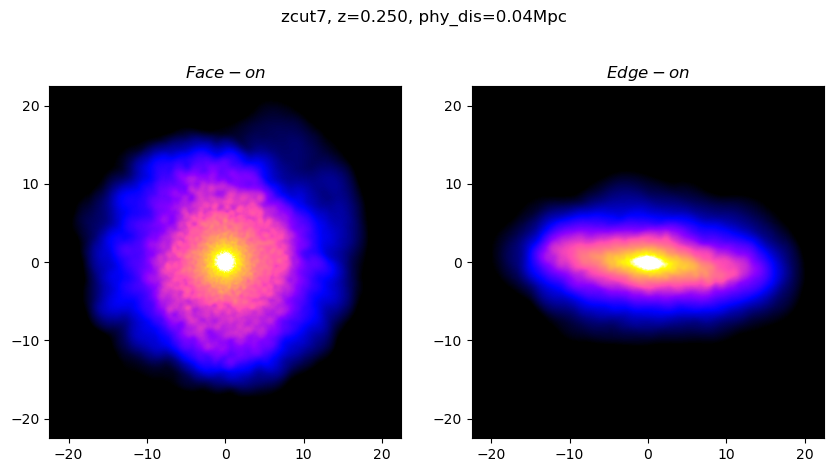

0

In [74]:
plot_star(star1/h, scale_subhalo, rotation_matrix, file_id, 'zcut7', z[i] , r = r, p = p, v=v, zoom=zoom)

In [77]:
rotation_matrix = np.array([[-0.4417713 ,  0.69599792, -0.56606096],
       [ 0.07457423, -0.60029704, -0.79629275],
       [-0.89402282, -0.39399285,  0.2132905 ]])
# r = 'infinity'
# zoom = 1/tan_225
# zoom = 1
# v = [4.3, 8.8]
# v=[6,9]
# scale_subhalo = 50/1000
# r = scale_subhalo/tan_225
# # r = 'infinity'
# zoom = 1/tan_225
# # zoom = 1
# p = 0

# v=[6,9.5]

87764
175_z000p250
(87764, 3)


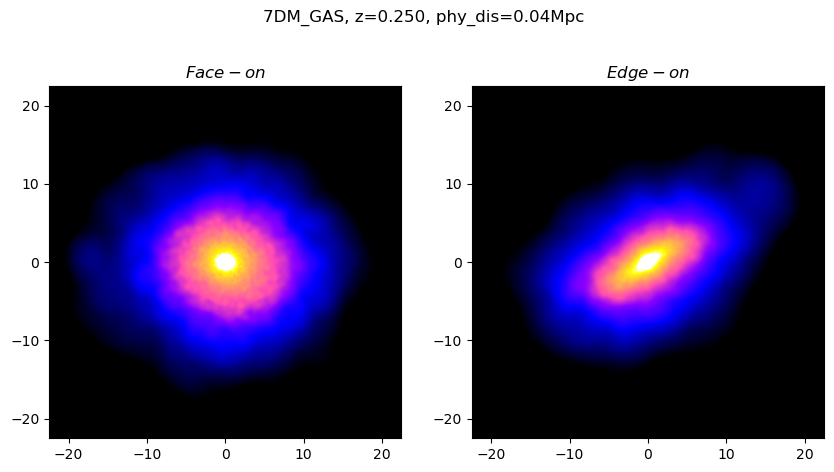

0

In [78]:
plot_star(star2/h, scale_subhalo, rotation_matrix, file_id, '7DM_GAS', z[i], r = r, p = p, v=v, zoom=zoom)

In [85]:
root = '/home/zhaox/Magpie/M1_zcut7/snapshot_199_z000p000/snap_199_z000p000.0.hdf5'

In [124]:
with h5py.File(root, 'r' ) as hf:
        # data = hf[file]
        print ("root.keys = " , hf.keys())
        # data = hf['PartType0']
        # print(data.keys())
        data = hf['PartType1/Mass'][:]
        

root.keys =  <KeysViewHDF5 ['Config', 'Constants', 'HashTable', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5', 'RuntimePars', 'Units']>


KeyError: "Unable to open object (object 'Mass' doesn't exist)"

In [113]:
data.shape

(1002762,)

In [114]:
data[:10]

array([8.548007e-06, 8.368618e-06, 8.368618e-06, 8.368618e-06,
       8.368618e-06, 8.368618e-06, 8.368618e-06, 8.368618e-06,
       8.368618e-06, 8.368618e-06], dtype=float32)

In [123]:
len(np.where(data-8.548007e-06 > 1e-14)[0])

15545

In [13]:
# from 13 satellite
rotation_matrix = np.array([[-0.58925189,  0.3286197 , -0.73809979],\
                           [-0.32955748, -0.9318545 , -0.15178623],\
                           [-0.73768155,  0.15380598,  0.65739611]])
scale_subhalo = 300
for index, file_id in enumerate(file_ids[128:]):
    star = np.loadtxt("./star_data/star_rot_pos"+file_id+".txt")
    p = -0.9 * index + 180
    plot_star(star, scale_subhalo, rotation_matrix, file_id=file_id, r = 603.55, p = p, v=[6, 10.5], zoom=2.41421356237)

128_z001p150
129_z001p125
130_z001p099
131_z001p074
132_z001p049
133_z001p024
134_z001p000
135_z000p976
136_z000p952
137_z000p928
138_z000p905
139_z000p882
140_z000p859
141_z000p837
142_z000p815
143_z000p793
144_z000p772
145_z000p750
146_z000p729
147_z000p709
148_z000p689
149_z000p669
150_z000p649
151_z000p630
152_z000p611
153_z000p592
154_z000p573
155_z000p555
156_z000p537
157_z000p520
158_z000p503
159_z000p486
160_z000p469
161_z000p452
162_z000p436
163_z000p420
164_z000p405
165_z000p389
166_z000p374
167_z000p360
168_z000p345
169_z000p331
170_z000p317
171_z000p303
172_z000p289
173_z000p276
174_z000p263
175_z000p250
176_z000p237
177_z000p225
178_z000p213
179_z000p201
180_z000p189
181_z000p177
182_z000p166
183_z000p155
184_z000p144
185_z000p133
186_z000p122
187_z000p112
188_z000p102
189_z000p092
190_z000p082
191_z000p072
192_z000p063
193_z000p053
194_z000p044
195_z000p035
196_z000p026
197_z000p017
198_z000p008
199_z000p000


In [2]:
import imageio
filenames = os.listdir("/home/zhaox/app/star_pig/star_pic_1200kpc")
filenames.sort(key=lambda x:float(x[0:3]))
with imageio.get_writer('./star_gif/star_evolution_1000kpc.gif', mode='I',duration=0.1) as writer:
    for filename in filenames:
        print(filename)
        image = imageio.imread("/home/zhaox/app/star_pig/star_pic_1200kpc/"+filename)
        writer.append_data(image)

004_z015p951.png
005_z015p172.png
006_z014p462.png
007_z013p813.png
008_z013p216.png
009_z012p666.png
010_z012p157.png
011_z011p686.png
012_z011p247.png
013_z010p839.png
014_z010p457.png
015_z010p100.png
016_z009p766.png
017_z009p451.png
018_z009p155.png
019_z008p876.png
020_z008p612.png
021_z008p363.png
022_z008p127.png
023_z007p903.png
024_z007p691.png
025_z007p489.png
026_z007p296.png
027_z007p113.png
028_z006p939.png
029_z006p772.png
030_z006p613.png
031_z006p461.png
032_z006p315.png
033_z006p176.png
034_z006p042.png
035_z005p914.png
036_z005p791.png
037_z005p673.png
038_z005p559.png
039_z005p449.png
040_z005p343.png
041_z005p241.png
042_z005p142.png
043_z005p047.png
044_z004p955.png
045_z004p865.png
046_z004p778.png
047_z004p694.png
048_z004p612.png
049_z004p533.png
050_z004p455.png
051_z004p380.png
052_z004p307.png
053_z004p235.png
054_z004p166.png
055_z004p097.png
056_z004p031.png
057_z003p966.png
058_z003p902.png
059_z003p840.png
060_z003p779.png
061_z003p720.png
062_z003p661.p